In [1]:
import torch
import torch.nn as nn
import torchvision
from matplotlib import pyplot as plt
from torchvision import transforms


class QuadraticSwish(nn.Module):
    def __init__(self):
        super().__init__()
        self.beta = nn.Parameter(torch.ones(1))

    def forward(self, x):
        return self.beta * x**2 * torch.sigmoid(self.beta * x)

Running ReLU experiment...
Using device: cuda


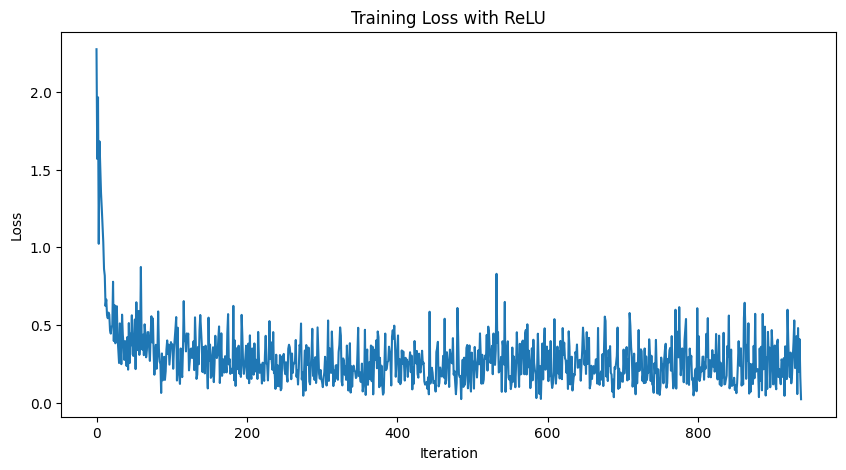

Running QuadraticSwish experiment...
Using device: cuda


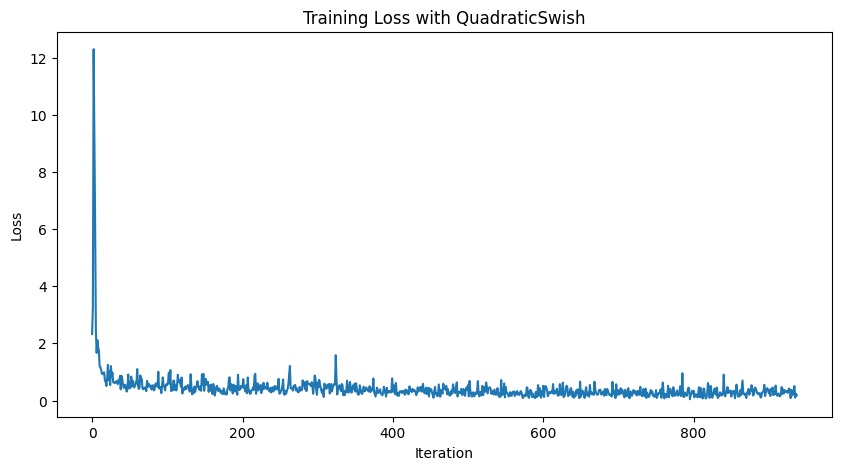

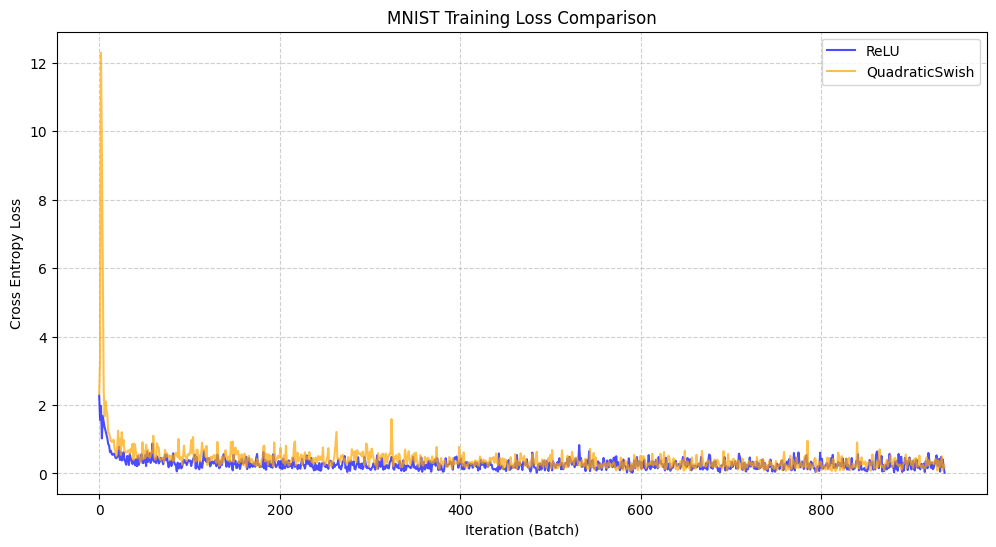

In [2]:
from activison_function.experiment_fcnn import experiment_on_fcnn

# Run experiments
print("Running ReLU experiment...")
relu_loss = experiment_on_fcnn(nn.ReLU)

print("Running QuadraticSwish experiment...")
quadratic_swish_loss = experiment_on_fcnn(QuadraticSwish)

# Plotting both on one graph
plt.figure(figsize=(12, 6))

plt.plot(relu_loss, label='ReLU', alpha=0.7, color='blue')
plt.plot(quadratic_swish_loss, label='QuadraticSwish', alpha=0.7, color='orange')

plt.title("MNIST Training Loss Comparison")
plt.xlabel("Iteration (Batch)")
plt.ylabel("Cross Entropy Loss")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

In [3]:
from activison_function.experiment_cnn import train_config

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

# 加载CIFAR10数据集
trainset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=128, shuffle=True, num_workers=4)

testset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=128, shuffle=False, num_workers=4)

# 训练你的模型（用QuadraticSwish激活函数）
relu_loss, relu_train_acc, relu_test_acc = train_config(torch.nn.ReLU, device,
                                                        trainloader, testloader, epochs=40)
qswish_loss, qswish_train_acc, qswish_test_acc = train_config(QuadraticSwish, device,
                                                              trainloader, testloader, epochs=40)


开始训练模型（激活函数：ReLU）
Loss: 1.4775 | Train Acc: 45.52% | Test Acc: 51.38%
Loss: 1.1625 | Train Acc: 58.02% | Test Acc: 56.16%
Loss: 1.0376 | Train Acc: 62.65% | Test Acc: 50.13%
Loss: 0.9605 | Train Acc: 65.72% | Test Acc: 59.34%
Loss: 0.8951 | Train Acc: 68.23% | Test Acc: 61.82%
Loss: 0.8534 | Train Acc: 69.66% | Test Acc: 64.74%
Loss: 0.8149 | Train Acc: 71.16% | Test Acc: 65.16%
Loss: 0.7740 | Train Acc: 72.54% | Test Acc: 68.14%
Loss: 0.7388 | Train Acc: 74.24% | Test Acc: 63.40%
Loss: 0.7157 | Train Acc: 74.85% | Test Acc: 71.42%
Loss: 0.6856 | Train Acc: 75.85% | Test Acc: 65.85%
Loss: 0.6675 | Train Acc: 76.51% | Test Acc: 73.33%
Loss: 0.6412 | Train Acc: 77.46% | Test Acc: 73.81%
Loss: 0.6275 | Train Acc: 77.92% | Test Acc: 67.28%
Loss: 0.6076 | Train Acc: 78.65% | Test Acc: 58.47%
Loss: 0.5915 | Train Acc: 79.33% | Test Acc: 72.12%
Loss: 0.5740 | Train Acc: 80.00% | Test Acc: 66.40%
Loss: 0.5568 | Train Acc: 80.38% | Test Acc: 69.36%
Loss: 0.5415 | Train Acc: 81.06% | Test Acc: 

In [4]:
class Swish(nn.Module):
    def __init__(self):
        super().__init__()
        self.beta = nn.Parameter(torch.ones(1))

    def forward(self, x):
        return ((self.beta * x)) * torch.sigmoid(self.beta * x)


leaky_relu_loss, leaky_relu_train_acc, leaky_relu_test_acc = train_config(torch.nn.LeakyReLU, device,
                                                        trainloader, testloader, epochs=40)
sigmoid_loss, sigmoid_train_acc, sigmoid_test_acc = train_config(torch.nn.Sigmoid, device,
                                                        trainloader, testloader, epochs=40)
swish_loss, swish_train_acc, swish_test_acc = train_config(Swish, device,
                                                        trainloader, testloader, epochs=40)


开始训练模型（激活函数：LeakyReLU）
Loss: 1.4667 | Train Acc: 46.55% | Test Acc: 52.57%
Loss: 1.1652 | Train Acc: 58.35% | Test Acc: 56.55%
Loss: 1.0472 | Train Acc: 62.66% | Test Acc: 63.05%
Loss: 0.9626 | Train Acc: 65.65% | Test Acc: 64.08%
Loss: 0.9116 | Train Acc: 67.73% | Test Acc: 67.35%
Loss: 0.8606 | Train Acc: 69.58% | Test Acc: 58.03%
Loss: 0.8262 | Train Acc: 70.71% | Test Acc: 59.31%
Loss: 0.7913 | Train Acc: 72.16% | Test Acc: 67.59%
Loss: 0.7570 | Train Acc: 73.35% | Test Acc: 63.78%
Loss: 0.7263 | Train Acc: 74.55% | Test Acc: 65.83%
Loss: 0.6927 | Train Acc: 75.81% | Test Acc: 67.71%
Loss: 0.6748 | Train Acc: 76.18% | Test Acc: 71.70%
Loss: 0.6495 | Train Acc: 77.33% | Test Acc: 69.59%
Loss: 0.6286 | Train Acc: 77.99% | Test Acc: 71.62%
Loss: 0.6119 | Train Acc: 78.56% | Test Acc: 74.17%
Loss: 0.5924 | Train Acc: 79.30% | Test Acc: 74.67%
Loss: 0.5777 | Train Acc: 79.73% | Test Acc: 73.74%
Loss: 0.5583 | Train Acc: 80.41% | Test Acc: 65.64%
Loss: 0.5515 | Train Acc: 80.86% | Test 

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18060\3066973715.py:67: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 自动调整子图间距
C:\Users\Administrator\AppData\Local\Temp\ipykernel_18060\3066973715.py:67: UserWarning: Glyph 39640 (\N{CJK UNIFIED IDEOGRAPH-9AD8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 自动调整子图间距
C:\Users\Administrator\AppData\Local\Temp\ipykernel_18060\3066973715.py:67: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 自动调整子图间距
C:\Users\Administrator\AppData\Local\Temp\ipykernel_18060\3066973715.py:67: UserWarning: Glyph 35797 (\N{CJK UNIFIED IDEOGRAPH-8BD5}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 自动调整子图间距
C:\Users\Administrator\AppData\Local\Temp\ipykernel_18060\3066973715.py:67: UserWarning: Glyph 31934 (\N{CJK UNIFIED IDEOGRAPH-7CBE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 自动调整

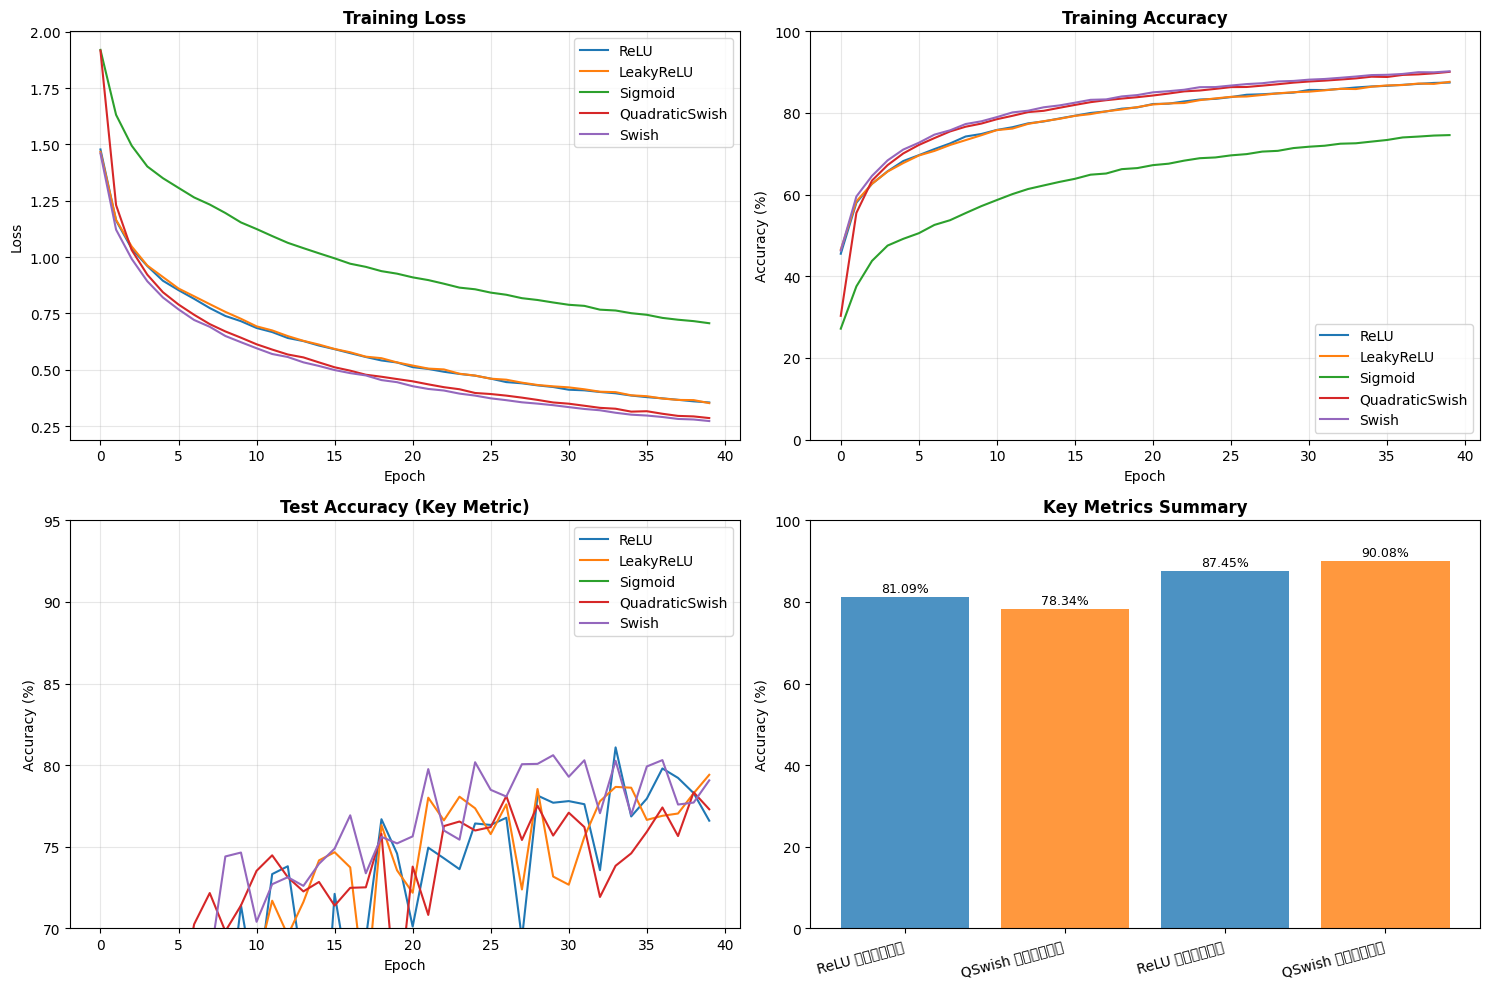


==================== 实验结果汇总 ====================
ReLU 模型 - 最高测试集精度: 81.09%
QuadraticSwish 模型 - 最高测试集精度: 78.34%
ReLU 模型 - 最终训练集精度: 87.45%
QuadraticSwish 模型 - 最终训练集精度: 90.08%

QuadraticSwish 相比 ReLU 测试精度提升: -2.75 个百分点


In [5]:
import numpy as np

plt.rcParams['font.size'] = 10
plt.figure(figsize=(15, 10))

# 1. 训练损失对比
plt.subplot(2, 2, 1)
plt.plot(relu_loss, label='ReLU', linewidth=1.5)
plt.plot(leaky_relu_loss, label='LeakyReLU', linewidth=1.5)
plt.plot(sigmoid_loss, label='Sigmoid', linewidth=1.5)
plt.plot(qswish_loss, label='QuadraticSwish', linewidth=1.5)
plt.plot(swish_loss, label='Swish', linewidth=1.5)
plt.title('Training Loss', fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(alpha=0.3)

# 2. 训练集精度对比
plt.subplot(2, 2, 2)
plt.plot(relu_train_acc, label='ReLU', linewidth=1.5)
plt.plot(leaky_relu_train_acc, label='LeakyReLU', linewidth=1.5)
plt.plot(sigmoid_train_acc, label='Sigmoid', linewidth=1.5)
plt.plot(qswish_train_acc, label='QuadraticSwish', linewidth=1.5)
plt.plot(swish_train_acc, label='Swish', linewidth=1.5)
plt.title('Training Accuracy', fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)  # 固定y轴范围，更易对比
plt.legend()
plt.grid(alpha=0.3)

# 3. 测试集精度对比（核心）
plt.subplot(2, 2, 3)
plt.plot(relu_test_acc, label='ReLU', linewidth=1.5)
plt.plot(leaky_relu_test_acc, label='LeakyReLU', linewidth=1.5)
plt.plot(sigmoid_test_acc, label='Sigmoid', linewidth=1.5)
plt.plot(qswish_test_acc, label='QuadraticSwish', linewidth=1.5)
plt.plot(swish_test_acc, label='Swish', linewidth=1.5)
plt.title('Test Accuracy (Key Metric)', fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.ylim(70, 95)  # 聚焦有效范围
plt.legend()
plt.grid(alpha=0.3)

# 4. 关键指标汇总
plt.subplot(2, 2, 4)
metrics = ['ReLU 最高测试精度', 'QSwish 最高测试精度', 'ReLU 最终训练精度', 'QSwish 最终训练精度']
values = [
    np.max(relu_test_acc),
    np.max(qswish_test_acc),
    relu_train_acc[-1],
    qswish_train_acc[-1]
]
colors = ['#1f77b4', '#ff7f0e', '#1f77b4', '#ff7f0e']
bars = plt.bar(metrics, values, color=colors, alpha=0.8)
plt.title('Key Metrics Summary', fontweight='bold')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
# 在柱子上标注数值
for bar, val in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,
             f'{val:.2f}%', ha='center', va='bottom', fontsize=9)
plt.xticks(rotation=15, ha='right')  # 旋转x轴标签，避免重叠

plt.tight_layout()  # 自动调整子图间距
plt.savefig('experiment_results.png', dpi=300, bbox_inches='tight')  # 保存高清图片
plt.show()

# 打印详细结果
print("\n==================== 实验结果汇总 ====================")
print(f"ReLU 模型 - 最高测试集精度: {np.max(relu_test_acc):.2f}%")
print(f"QuadraticSwish 模型 - 最高测试集精度: {np.max(qswish_test_acc):.2f}%")
print(f"ReLU 模型 - 最终训练集精度: {relu_train_acc[-1]:.2f}%")
print(f"QuadraticSwish 模型 - 最终训练集精度: {qswish_train_acc[-1]:.2f}%")
print(f"\nQuadraticSwish 相比 ReLU 测试精度提升: {np.max(qswish_test_acc) - np.max(relu_test_acc):.2f} 个百分点")